# Problem Formulation

>**The problem:** 

How can someone price their listing when posting it on Airbnb without doing a lot of search so we solved this problem by predicting the listing price based on its charachteristics .

>**input:**

A dataset contains listings of different areas in Montreal during 2019. It comes with rich information for each listing, including a link to the thumbnails etc.

>**output:**

* Predict the actual price
* Recommend a pricing range to the new host rather than a fix price

>**Data Minning Function**

This is a multi-objective (multi-task) multi-modality classification using neural networks task.


>**The challanges could be**

* Data cleaning, dealing with missing data, model architechture ,feature selection,feature engineering, irrelevant features, Not enough training data, Nonrepresentative training data, data imbalance, overfitting or underfitting.

* representation, Challenges associated with multimodal representation include dealing with different noise levels, missing data, and combining data from different modalities.

* Creating a suitable neural netwrok architechture.

* Translation,translating data from one modality to another.

* Fusion,joining information from two or more modalities to perform the data minning task.
 
* Co-learning, transferring knowledge between modalities.

> **The impact:**

This can optimize and facilitate user experience and lower the bar to be a new host and users won't have to do alot of search to price their listings.



> **The ideal solution**

is to select and design a machine learning model that suits the data and understand the important features that have high impact on classification and prediction.

>**The problem:** 

How can someone price their listing when posting it on Airbnb without doing a lot of search so we solved this problem by predicting the listing price based on its charachteristics .

>**input:**

A dataset contains listings of different areas in Montreal during 2019. It comes with rich information for each listing, including a link to the thumbnails etc.

>**output:**

* Predict the actual price
* Recommend a pricing range to the new host rather than a fix price

>**Data Minning Function**

This is a multi-objective (multi-task) multi-modality classification using neural networks task.


>**The challanges could be**

Data cleaning, dealing with missing data, model selection, model complexity,feature selection,feature engineering, irrelevant features, Not enough training data, Nonrepresentative training data, data imbalance, overfitting or underfitting.representation, translation, alignment, fusion, and co-learning

* Challenges associated with multimodal representation include dealing with different noise levels, missing data, and combining data from different modalities.

* 

> **The impact:**

we can implement a recommendation system to better match people in speed dating events. and we can understand what are the most important attributes for people who matched with each other.



> **The ideal solution**

is to select and design a machine learning model that suits the data and understand the important features that have high impact on classification and prediction.

# Questions

> 🌈 Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?

* Fully-connected models are not suitable for sequential data because they do not take into account the temporal dependencies between data points. Instead, recurrent neural networks (RNNs) are used for sequential data because they can capture temporal dependencies between data points. 

* Fully-connected models are not the best choice for image data because they aren’t good for feature extraction but they can do the task for an extent because they can model long-range dependencies and positional patterns . Convolutional neural networks (CNNs) are better used for image data because they can capture local structures even better than fully-connected layers.

> 🌈 What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?

* The vanishing gradient problem occurs when the gradients become too small during backpropagation, which makes it difficult for the network to learn long-term dependencies. 

* On the other hand, the exploding gradient problem occurs when the gradients become too large during backpropagation, which can cause the network to diverge.

* Both GRU and LSTM use gating mechanisms that allow them to selectively remember or forget information from previous time steps, which helps them to learn long-term dependencies more effectively than basic RNNs.These gating mechanisms help to ensure that the gradients do not become too small or too large during backpropagation, which makes it easier for the network to learn long-term dependencies 

> 🌈 What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?
 
* Multitask learning aims to learn multiple tasks at the same time. Those tasks could be for data of the same kind It's a subfield of machine learning in which multiple learning tasks are solved at the same time while exploiting commonalities and differences across tasks. This can result in improved learning efficiency and prediction accuracy for the task-specific models when compared to training the models separately.In MTL, a model is trained to perform multiple tasks simultaneously by sharing some of the network’s layers and parameters across tasks.

* Multimodal learning deals with different kinds of data such as text, image, audio etc. and tries to learn a joint representation of the data

* We will use them in as we will predict thw price & the type at the same time.

> 🌈 What is the difference among xgboost, lightgbm and catboost?

* XGBoost, LightGBM and CatBoost are all gradient boosting frameworks that use decision trees as their base models. 

* They differ in their tree construction algorithms and how they handle categorical features. 
  * CatBoost builds symmetric (balanced) trees, unlike XGBoost and LightGBM which result in asymmetric trees.
  * LightGBM uses leaf-wise (best-first) tree growth while Catboost grows a balanced tree. XGBoost has a hybrid approach that grows trees level-wise and prunes them using a global optimal solution


# Implementation

In [1]:
# Necessary libraries
!pip install langdetect
import pandas as pd
import numpy as np
from zipfile import ZipFile
from google.colab import drive
from langdetect import detect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# # unzip the file on drive
# with ZipFile('/content/drive/MyDrive/competition 4/data.zip','r') as zip_obj:
#     zip_obj.extractall('/content/drive/MyDrive/competition 4')


In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/competition 4/a4/train_xy.csv')
df_test= pd.read_csv('/content/drive/MyDrive/competition 4/a4/test_x.csv')

## Data Exploration

In [5]:
df_train.shape,df_test.shape

((7627, 4), (7360, 3))

In [6]:
df_train

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0
...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,Apartment,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,Apartment,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,Apartment,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,Apartment,0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  7326 non-null   object
 1   image    7627 non-null   object
 2   type     7627 non-null   object
 3   price    7627 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 238.5+ KB


In [8]:
# checking type values
df_train['type'].value_counts()

Apartment                 5765
Condominium                691
House                      406
Loft                       324
Townhouse                  167
Serviced apartment          77
Bed and breakfast           38
Guest suite                 32
Hostel                      26
Bungalow                    25
Guesthouse                  14
Cottage                     12
Aparthotel                  12
Boutique hotel              10
Other                        8
Villa                        7
Tiny house                   3
Boat                         2
Cabin                        2
Camper/RV                    2
Casa particular (Cuba)       1
Hotel                        1
Earth house                  1
Castle                       1
Name: type, dtype: int64

In [9]:
# we have 24 types in type column
df_train['type'].nunique()

24

In [10]:
# checking price values
df_train['price'].value_counts()

0    4737
1    2403
2     487
Name: price, dtype: int64

In [11]:
# Null Check
df_train.isna().sum()

summary    301
image        0
type         0
price        0
dtype: int64

In [12]:
# Duplicates check (zero)
df_train.duplicated().sum()

0

In [13]:
for index, row in df_train.iterrows():
    lang = detect(str(row['summary']))
    df_train.at[index, 'Language'] = lang

In [14]:
df_train

,summary,image,type,price,Language
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1,en
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0,en
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1,fr
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1,en
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0,fr
...,...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,Apartment,0,fr
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,Apartment,2,en
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,Apartment,1,en
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,Apartment,0,en


In [15]:
df_train['Language'].value_counts()

en       5253
fr       2038
tl        301
zh-cn      11
de          6
es          5
it          3
af          2
ko          1
nl          1
pl          1
da          1
ro          1
pt          1
vi          1
id          1
Name: Language, dtype: int64

In [16]:
# We have 13 languages 
df_train['Language'].nunique()

16

In [17]:
df_test

,id,summary,image
0,0,Charming warm house is ready to host you here ...,img_test/0.jpg
1,1,"La chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg
2,2,Grande chambre confortable située au sous-sol ...,img_test/2.jpg
3,3,"Près d’un Métro, ligne orange. 10 minutes à pi...",img_test/3.jpg
4,4,Very bright appartment and very cosy. 2 separa...,img_test/4.jpg
...,...,...,...
7355,7626,"Large, fully-furnished flat with brick walls a...",img_test/7627.jpg
7356,7627,Logement situé dans le haut d’un duplex. Vivez...,img_test/7628.jpg
7357,7628,"My place is close to parks, . My place is good...",img_test/7629.jpg
7358,7629,"*** For security reasons, I will prioritize gu...",img_test/7630.jpg


In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7360 entries, 0 to 7359
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       7360 non-null   int64 
 1   summary  7360 non-null   object
 2   image    7360 non-null   object
dtypes: int64(1), object(2)
memory usage: 172.6+ KB


In [19]:
df_test.duplicated().sum()

0

In [20]:
df_test.isna().sum()

id         0
summary    0
image      0
dtype: int64

In [21]:
for index, row in df_test.iterrows():
    summary = str(row['summary'])
    if len(summary) > 50:
        lang = detect(summary)
        df_test.at[index, 'Language'] = lang
    else:
        df_test.at[index, 'Language'] = 'unknown'

In [22]:
df_test['Language'].value_counts()

en         5234
fr         2027
unknown      79
de            5
es            5
zh-cn         5
ko            2
pt            2
it            1
Name: Language, dtype: int64

In [23]:
df_test

,id,summary,image,Language
0,0,Charming warm house is ready to host you here ...,img_test/0.jpg,en
1,1,"La chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg,fr
2,2,Grande chambre confortable située au sous-sol ...,img_test/2.jpg,fr
3,3,"Près d’un Métro, ligne orange. 10 minutes à pi...",img_test/3.jpg,fr
4,4,Very bright appartment and very cosy. 2 separa...,img_test/4.jpg,en
...,...,...,...,...
7355,7626,"Large, fully-furnished flat with brick walls a...",img_test/7627.jpg,en
7356,7627,Logement situé dans le haut d’un duplex. Vivez...,img_test/7628.jpg,fr
7357,7628,"My place is close to parks, . My place is good...",img_test/7629.jpg,en
7358,7629,"*** For security reasons, I will prioritize gu...",img_test/7630.jpg,en


## Data Preprocessing

In [24]:
# labels:
# convert the labelsvto category
df_train['type'] = df_train['type'].astype('category').cat.codes
df_train['price'] = df_train['price'].astype('category').cat.codes

# get the total number of unique outputs (later used for prediction)
len_type = len(df_train['type'].unique())
len_price = len(df_train['price'].unique())

In [25]:
df_train.dropna(axis=0,inplace=True)

### Image data preprocessing

In [26]:
# preprocess image data
from PIL import Image
import os

def load_image(file):
      try:
         image = Image.open(file).convert('LA').resize((128, 128))
         arr = np.array(image)
         
      except: 
        arr = np.zeros((128, 128, 2))
      return arr


In [27]:
#imgs=load_image('/content/drive/MyDrive/competition 4/a4/img_train')

In [28]:
x_train_image = np.array([load_image('/content/drive/MyDrive/competition 4/a4/'+i) for i in df_train.image])

In [29]:
x_test_image = np.array([load_image('/content/drive/MyDrive/competition 4/a4/'+i) for i in df_test.image])

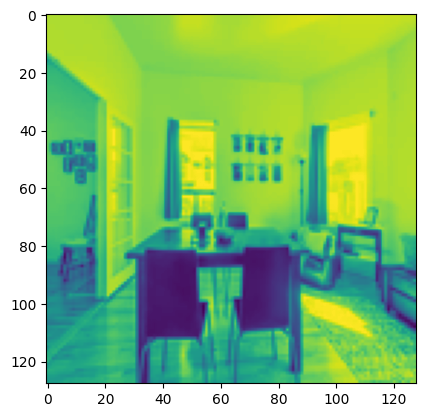

In [30]:
import matplotlib.pyplot as plt
plt.imshow(x_train_image[0,:,:,0])

### Text Preprocessing

In [31]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=b6a40241d2f4f953f2b7809f75f6871bf66972a270572e9e58dfbaad57365d12
  Stored in directory: /root/.cache/pip/wheels/ae/e1/6c/5137bc3f35aa130deea71575e165cc4f4f0680a88f3d90a636
Successfully built googletrans


In [32]:
from googletrans import Translator
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [33]:
translator = Translator()
df_train['summary_en'] = [translator.translate(sentence, dest='en').text
                       for sentence in df_train.summary]

In [34]:
df_train

,summary,image,type,price,Language,summary_en
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,1,1,en,"Spacious, sunny and cozy modern apartment in t..."
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,1,0,en,Located in one of the most vibrant and accessi...
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,1,1,fr,Pretty and cozy accommodation 10 minutes from ...
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,1,1,en,"Beautiful and spacious (1076 sc ft, / 100 mc) ..."
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,1,0,fr,Very large ''rustic'' and very pleasant apartm...
...,...,...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,1,0,fr,"A large 4 and 1/2 apartment, all inclusive, we..."
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,1,2,en,Magnificent condo directly on the river. You w...
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,1,1,en,This apartment is perfect for anyone visiting ...
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,1,0,en,"It is a cozy ,clean ,and comfortable apartment..."


In [35]:
df_test['summary_en'] = [translator.translate(sentence, dest='en').text
                       for sentence in df_test.summary]

In [36]:
df_test

,id,summary,image,Language,summary_en
0,0,Charming warm house is ready to host you here ...,img_test/0.jpg,en,Charming warm house is ready to host you here ...
1,1,"La chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg,fr,"The room is spacious and bright, in an apartme..."
2,2,Grande chambre confortable située au sous-sol ...,img_test/2.jpg,fr,Large comfortable room located in the basement...
3,3,"Près d’un Métro, ligne orange. 10 minutes à pi...",img_test/3.jpg,fr,"Near a Metro, orange line. 10 minutes walking...."
4,4,Very bright appartment and very cosy. 2 separa...,img_test/4.jpg,en,Very bright appartment and very cosy. 2 separa...
...,...,...,...,...,...
7355,7626,"Large, fully-furnished flat with brick walls a...",img_test/7627.jpg,en,"Large, fully-furnished flat with brick walls a..."
7356,7627,Logement situé dans le haut d’un duplex. Vivez...,img_test/7628.jpg,fr,Accommodation located at the top of a duplex. ...
7357,7628,"My place is close to parks, . My place is good...",img_test/7629.jpg,en,"My place is close to parks, . My place is good..."
7358,7629,"*** For security reasons, I will prioritize gu...",img_test/7630.jpg,en,"*** For security reasons, I will prioritize gu..."


In [37]:
x_train_text = df_train['summary_en'].astype('str')
y_train_type = df_train['type']
y_train_price = df_train['price']

In [38]:
# Tokenization 
vocab_size = 21000
max_len = 150

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train_text)

def txt_preprocess(list_of_text):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),
        maxlen=max_len,
        padding='post',
    )

x_train_text_id = txt_preprocess(x_train_text)

print(x_train_text_id.shape)

(7326, 150)


In [39]:
x_test_text = txt_preprocess(df_test['summary_en'].astype('str'))


In [40]:
print('dictionary words count:', tokenizer.num_words)


dictionary words count: 21000


In [41]:
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential, Model
from keras.layers import LSTM, GRU, Dense, Input, Dropout, Bidirectional, Embedding, Conv2D, Flatten, MaxPooling2D, AveragePooling2D
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, GridSearchCV
from keras import Sequential, Model
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
from tensorflow.keras.optimizers import Adam

In [42]:
# function of each trial prediction results
def predictions(x_test_text, x_test_image, model):
  y_pred = model.predict(
      {
          'summary': x_test_text,
          'image': x_test_image
      }
  )


  # probabilities
  pred_price= y_pred['price']

  # categories
  cat_price = np.argmax(pred_price, axis=1)
  
  return cat_price

In [43]:
def submission_file(test, cat_price, file_name):
  
  submission = pd.DataFrame(
    {'id': test.id,
     'price': cat_price}
  )
  submission.to_csv(file_name, index=False)

## Models 

### Trial (0)

* simple average of embedding
* validation split = 0.2
* epochs = 5
* No early stopping

In [44]:
# model architecture

# here we have two inputs (aka multimodality)
txt_input = keras.Input(batch_shape=(None, max_len))
img_input = keras.Input(batch_shape=(None, 128, 128, 2))

# text part
# simple average of embedding. 
embedded = keras.layers.Embedding(tokenizer.num_words, 150)(txt_input)
averaged = tf.reduce_mean(embedded, axis=1)


# image part 
# simple conv2d
cov = Conv2D(32, (3, 3))(img_input)
pl = MaxPooling2D((3, 3))(cov)
flattened = Flatten()(pl)


# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': txt_input,
        'image': img_input
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 2  0           []                               
                                )]                                                                
                                                                                                  
 input_1 (InputLayer)           [(None, 150)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 32  608         ['input_2[0][0]']                
                                )                                                                 
                                                                                              

In [45]:
# Training model
history = model.fit(
    x={'summary': x_train_text_id,'image': x_train_image},
    y={'type': y_train_type,'price': y_train_price,},
    epochs=5,
    batch_size=27,
    validation_split=0.2,
    verbose=1
    )

Epoch 1/5
218/218 [==============================] - 91s 409ms/step - loss: 186.7831 - price_loss: 140.9012 - type_loss: 232.6650 - price_sparse_categorical_accuracy: 0.5097 - type_sparse_categorical_accuracy: 0.5794 - val_loss: 102.3500 - val_price_loss: 33.5921 - val_type_loss: 171.1077 - val_price_sparse_categorical_accuracy: 0.3922 - val_type_sparse_categorical_accuracy: 0.0300
Epoch 2/5
218/218 [==============================] - 88s 402ms/step - loss: 37.7070 - price_loss: 24.2764 - type_loss: 51.1376 - price_sparse_categorical_accuracy: 0.5608 - type_sparse_categorical_accuracy: 0.6109 - val_loss: 45.5871 - val_price_loss: 30.8405 - val_type_loss: 60.3337 - val_price_sparse_categorical_accuracy: 0.5900 - val_type_sparse_categorical_accuracy: 0.3615
Epoch 3/5
218/218 [==============================] - 87s 402ms/step - loss: 16.7915 - price_loss: 13.9095 - type_loss: 19.6735 - price_sparse_categorical_accuracy: 0.6172 - type_sparse_categorical_accuracy: 0.6724 - val_loss: 27.6221 -

In [46]:
price_cat_pred = predictions(x_test_text, x_test_image, model)

submission_file(df_test, price_cat_pred, 'submission_trial_0.csv')

230/230 [==============================] - 33s 142ms/step


> Thoughts and observations for trial 0

the model is underfitting and gives:
* Accuracy in training : `60%` 
* Accuracy in validation : `46%` 
* Accuracy in test : `45%`


> plan for trial 1


*   LSTM 

### Trial (1)
 
* **LSTM** 
* droupout = 0.2
* adam optimizer
* batch size = 27
* validation split = 0.2
* epochs = 5

In [47]:
# two inputs. one for image and the other for text.
txt_input = keras.Input(batch_shape=(None, max_len))
img_input = keras.Input(batch_shape=(None, 128, 128, 2))

# text part
# simple average of embedding with LSTM. 
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(txt_input)
lstm = keras.layers.LSTM(64, dropout=.2, return_sequences=True)(embedded)
averaged = tf.reduce_mean(lstm, axis=1)


# image part 
# simple conv2d. 
cov = Conv2D(32, (3, 3))(img_input)
pl = MaxPooling2D((3, 3))(cov)
drop = Dropout(0.2)(pl)
flattened = Flatten()(drop)


# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


#  model input/output.
model2 = keras.Model(
    inputs={
        'summary': txt_input,
        'image': img_input
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with loss values & loss weights for each task.
model2.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 2  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 150)]        0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 126, 126, 32  608         ['input_4[0][0]']                
                                )                                                                 
                                                                                            

In [48]:
# Training model
history = model2.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=5,
    batch_size=27,
    validation_split=0.2,
    verbose=1
)

Epoch 1/5
218/218 [==============================] - 112s 494ms/step - loss: 165.0493 - price_loss: 156.5191 - type_loss: 173.5794 - price_sparse_categorical_accuracy: 0.5092 - type_sparse_categorical_accuracy: 0.5857 - val_loss: 70.3297 - val_price_loss: 61.5314 - val_type_loss: 79.1280 - val_price_sparse_categorical_accuracy: 0.6037 - val_type_sparse_categorical_accuracy: 0.7415
Epoch 2/5
218/218 [==============================] - 116s 534ms/step - loss: 31.2000 - price_loss: 24.2894 - type_loss: 38.1106 - price_sparse_categorical_accuracy: 0.5621 - type_sparse_categorical_accuracy: 0.6321 - val_loss: 23.8770 - val_price_loss: 17.0420 - val_type_loss: 30.7119 - val_price_sparse_categorical_accuracy: 0.5778 - val_type_sparse_categorical_accuracy: 0.5805
Epoch 3/5
218/218 [==============================] - 114s 524ms/step - loss: 10.7950 - price_loss: 8.9031 - type_loss: 12.6869 - price_sparse_categorical_accuracy: 0.6343 - type_sparse_categorical_accuracy: 0.7061 - val_loss: 16.6342 -

In [49]:
price_cat_pred = predictions(x_test_text, x_test_image, model2)

submission_file(df_test, price_cat_pred, 'submission_trial_1.csv')

230/230 [==============================] - 37s 159ms/step


> Thoughts and observations for trial 1

the model is underfitting and gives:
* Accuracy in training : `62%` 
* Accuracy in validation : `55%` 
* Accuracy in test : `50%`


> plan for trial 2

* **GRU**
* minimize dropout = 0.1
* increase epochs = 10
* EarlyStopping 
* patience = 3

### Trial (2)

* GRU 
* droupout = 0.1
* adam optimizer
* batch size = 27
* validation split = 0.2

In [50]:

# two inputs. one for image and the other for text.
txt_input = keras.Input(batch_shape=(None, max_len))
img_input = keras.Input(batch_shape=(None, 128, 128, 2))

# text part
# simple average of embedding with GRU.
embedded = keras.layers.Embedding(tokenizer.num_words, 150)(txt_input)
gru = keras.layers.GRU(256, dropout=0.2, return_sequences=True)(embedded)
averaged = tf.reduce_mean(gru, axis=1)


# image part 
# simple conv2d. 
cov = Conv2D(32, (3, 3))(img_input)
pl = MaxPooling2D((3, 3))(cov)
drop = Dropout(0.1)(pl)
flattened = Flatten()(drop)


# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# model input/output .
model3 = keras.Model(
    inputs={
        'summary': txt_input,
        'image': img_input
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with loss values & loss weights for each task.
model3.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 2  0           []                               
                                )]                                                                
                                                                                                  
 input_5 (InputLayer)           [(None, 150)]        0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 126, 126, 32  608         ['input_6[0][0]']                
                                )                                                                 
                                                                                            

In [51]:
# Training model
history = model3.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=10,
    batch_size=27,
    validation_split=0.2,
        callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=3)
    ],
    verbose=1
)

Epoch 1/10
218/218 [==============================] - 210s 946ms/step - loss: 208.0747 - price_loss: 134.9527 - type_loss: 281.1969 - price_sparse_categorical_accuracy: 0.5167 - type_sparse_categorical_accuracy: 0.5846 - val_loss: 136.8634 - val_price_loss: 34.4209 - val_type_loss: 239.3059 - val_price_sparse_categorical_accuracy: 0.5089 - val_type_sparse_categorical_accuracy: 0.0655
Epoch 2/10
218/218 [==============================] - 202s 928ms/step - loss: 38.8171 - price_loss: 28.1243 - type_loss: 49.5098 - price_sparse_categorical_accuracy: 0.5580 - type_sparse_categorical_accuracy: 0.6155 - val_loss: 25.9654 - val_price_loss: 17.7825 - val_type_loss: 34.1483 - val_price_sparse_categorical_accuracy: 0.5443 - val_type_sparse_categorical_accuracy: 0.6801
Epoch 3/10
218/218 [==============================] - 202s 925ms/step - loss: 15.9789 - price_loss: 11.5201 - type_loss: 20.4377 - price_sparse_categorical_accuracy: 0.6089 - type_sparse_categorical_accuracy: 0.6903 - val_loss: 31.

In [ ]:
price_cat_pred = predictions(x_test_text, x_test_image, model3)

submission_file(df_test, price_cat_pred, 'submission_trial_2.csv')

223/230 [============================>.] - ETA: 1s

> Thoughts and observations for trial 2

the model is still underfitting and gives:
* Accuracy in training : `67%` 
* Accuracy in validation : `53%` 
* Accuracy in test : `50%`


> plan for trial 3

* Bidirectional
* remove dropout 
* increase epochs = 20
* EarlyStopping & patience = 5


### Trial (3)

*  Bidirectional 
* droupout = removed
* adam optimizer
* batch size = 17
* validation split = 0.2

In [ ]:
# two inputs. one for image and the other for text.
txt_input = keras.Input(batch_shape=(None, max_len))
img_input = keras.Input(batch_shape=(None, 128, 128, 2))

# text part
# simple average of embedding with Bidirectional. 
embedded = keras.layers.Embedding(tokenizer.num_words, 150)(txt_input)
bidirectional = keras.layers.Bidirectional(LSTM(128, return_sequences=True))(embedded)
averaged = tf.reduce_mean(bidirectional, axis=1)


# image part 
# simple conv2d. 
cov = Conv2D(32, (3, 3))(img_input)
pl = MaxPooling2D((3, 3))(cov)
flattened = Flatten()(pl)


# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output.
model4 = keras.Model(
    inputs={
        'summary': txt_input,
        'image': img_input
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with loss values & loss weights for each task.
model4.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model4.summary()

In [ ]:
# Training model
history = model4.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=20,
    batch_size=17,
    validation_split=0.2,
        callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5)
    ],
    verbose=1
)

Epoch 1/20
218/218 [==============================] - 225s 1s/step - loss: 198.3853 - price_loss: 175.3914 - type_loss: 221.3789 - price_sparse_categorical_accuracy: 0.5087 - type_sparse_categorical_accuracy: 0.5829 - val_loss: 53.3620 - val_price_loss: 42.6450 - val_type_loss: 64.0790 - val_price_sparse_categorical_accuracy: 0.3540 - val_type_sparse_categorical_accuracy: 0.4386
Epoch 2/20
218/218 [==============================] - 208s 954ms/step - loss: 33.2514 - price_loss: 25.3629 - type_loss: 41.1399 - price_sparse_categorical_accuracy: 0.5623 - type_sparse_categorical_accuracy: 0.6213 - val_loss: 40.1301 - val_price_loss: 24.5114 - val_type_loss: 55.7488 - val_price_sparse_categorical_accuracy: 0.4393 - val_type_sparse_categorical_accuracy: 0.2769
Epoch 3/20
218/218 [==============================] - 218s 998ms/step - loss: 18.3181 - price_loss: 15.4362 - type_loss: 21.2000 - price_sparse_categorical_accuracy: 0.6203 - type_sparse_categorical_accuracy: 0.6891 - val_loss: 28.5045 

In [ ]:
price_cat_pred = predictions(x_test_text, x_test_image, model4)

submission_file(df_test, price_cat_pred, 'submission_trial_3.csv')

> Thoughts and observations for trial 3
the model is  overfitting and gives:
* Accuracy in training : `70%` 
* Accuracy in validation : `44%` 
* Accuracy in test : `61%`


> plan for trial 4

* Simple model as NLP task
* batch size = 17
* validation split = 0.2
* EarlyStopping
* patience = 3
* epochs = 20


### Trial (4)

*  Simple model (NLP)
* one input - (text data) &  one output (the price)
* simple average of embedding
* adam optimizer
* batch size = 17
* validation split = 0.2
* EarlyStopping
* patience = 3
* epochs = 20


In [ ]:
#  one input for text (AKA NLP).
in_text = keras.Input(batch_shape=(None, max_len))

# simple average of embedding.
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)

# one dense layer for the output (price)
p_price = Dense(len_price, activation='softmax', name='price')(averaged)


# model input/output.
model5 = keras.Model(
    inputs={
        'summary': in_text
    },
    outputs={
        'price': p_price,
    },
)


# compile model  loss values & weights for each task.
model5.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy'
    },
    metrics={
        'price': ['SparseCategoricalAccuracy']
    },
)


model5.summary()

In [ ]:
history = model5.fit(
    x={
        'summary': x_train_text_id
    },
    y={
        'price': y_train_price
    },
    epochs=20,
    batch_size=17,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3 )],
    verbose=1
    )

In [ ]:
price_cat_pred = predictions(x_test_text, x_test_image, model5)

submission_file(df_test, price_cat_pred, 'submission_trial_4.csv')

> Thoughts and observations for trial 4

  the model is good fitting and gives:
* Accuracy in training : `87%` 
* Accuracy in validation : `54%` 
* Accuracy in test : `67%`


> plan for trial 5

* Simple model as Computer vision task
* dropout = 0.1
* batch size = 17 
* epochs = 20
* valid split = 0.2
* EarlyStopping & patience = 5


### Trial 5

* Simple model (CV)
* dropout = 0.1
* batch size = 17 
* epochs = 20
* valid split = 0.2
* EarlyStopping & patience = 5

In [62]:
# one input for image (AKA computer vision).
in_image = keras.Input(batch_shape=(None, 128, 128, 2))

# simple conv2d. you can change it to anything else as needed
cov = Conv2D(32, (3, 3))(in_image)
pl = MaxPooling2D((3, 3))(cov)
drop = Dropout(0.1)(pl)
cov2 = Conv2D(16, (3, 3))(drop)
pl2 = MaxPooling2D((3, 3))(cov2)
drop2 = Dropout(0.1)(pl2)
flattened = Flatten()(drop2)


# one dense layer for the output (price)
p_price = Dense(len_price, activation='softmax', name='price')(flattened)


# model input/output .
model6 = keras.Model(
    inputs={
        'image': in_image
    },
    outputs={
        'price': p_price,
    },
)


# compile model  loss values & loss weights for each task
model6.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy'
    },
    metrics={
        'price': ['SparseCategoricalAccuracy']
    },
)


model6.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 128, 128, 2)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      608       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 42, 42, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 42, 42, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 40, 40, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                       

In [63]:
history = model6.fit(
    x={
        'image': x_train_image
    },
    y={
        'price': y_train_price
    },
    epochs=20,
    batch_size=17,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5 )],
    verbose=1
    )

Epoch 1/20
345/345 [==============================] - 109s 313ms/step - loss: 11.2054 - sparse_categorical_accuracy: 0.4952 - val_loss: 3.6565 - val_sparse_categorical_accuracy: 0.5532
Epoch 2/20
345/345 [==============================] - 92s 265ms/step - loss: 3.1970 - sparse_categorical_accuracy: 0.5135 - val_loss: 1.7695 - val_sparse_categorical_accuracy: 0.5198
Epoch 3/20
345/345 [==============================] - 88s 257ms/step - loss: 1.9407 - sparse_categorical_accuracy: 0.5377 - val_loss: 2.3486 - val_sparse_categorical_accuracy: 0.3486
Epoch 4/20
345/345 [==============================] - 88s 255ms/step - loss: 1.5525 - sparse_categorical_accuracy: 0.5398 - val_loss: 1.3429 - val_sparse_categorical_accuracy: 0.5205
Epoch 5/20
345/345 [==============================] - 94s 272ms/step - loss: 1.2743 - sparse_categorical_accuracy: 0.5689 - val_loss: 1.2132 - val_sparse_categorical_accuracy: 0.4768
Epoch 6/20
345/345 [==============================] - 93s 270ms/step - loss: 1.1821

In [ ]:
price_cat_pred = predictions(x_test_text, x_test_image, model6)

submission_file(df_test, price_cat_pred, 'submission_trial_5.csv')

> Thoughts and observations for trial 5

  the model is  good fitting and gives:
* Accuracy in training : `52%` 
* Accuracy in validation : `50%` 
* Accuracy in test : `67%`


> plan for trial 5

* Simple model as Computer vision task
* dropout = 0.1
* batch size = 17 
* epochs = 20
* valid split = 0.2
* EarlyStopping & patience = 5


## Transfer learning

 ## VGG16

In [ ]:
# preprocess image data to fit the pretrained model

def load_image_rgb(file):
    try:
        image = Image.open(
            file
        ).resize((128, 128, 3))
        arr = np.array(image)
    except:
        arr = np.zeros((128, 128, 3))
    return arr


# loading images:
x_train_rgb_image = np.array([load_image_rgb(i) for i in df_train['image']])
x_test_rgb_image = np.array([load_image(i) for i in df_test['image']])

In [ ]:
# vgg16 model as a feature extraction model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model


# one input for image.
# configure model and with  a new input shape for images and avg pooling output
model_vgg = VGG16(include_top=False, input_shape=(128, 128, 3))


# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(len_price, activation='softmax')(class1)
# new model config
model_vgg = Model(inputs=model.inputs, outputs=output)

In [ ]:
model_vgg.compile(
    optimizer=Adam(),
    loss= 'sparse_categorical_crossentropy',
    metrics=['SparseCategoricalAccuracy'],
)

In [ ]:
%%time

history = model_vgg.fit(
    x_train_rgb_image,
    y_train_price,
    epochs=5,
    batch_size=17,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3 )
    ],
    verbose=1
)

Epoch 1/5
367/367 [==============================] - 1133s 3s/step - loss: 0.9023 - sparse_categorical_accuracy: 0.6043 - val_loss: 0.8349 - val_sparse_categorical_accuracy: 0.6241
Epoch 2/5
367/367 [==============================] - 1106s 3s/step - loss: 0.8489 - sparse_categorical_accuracy: 0.6183 - val_loss: 0.8442 - val_sparse_categorical_accuracy: 0.6241
Epoch 3/5
367/367 [==============================] - 1102s 3s/step - loss: 0.9015 - sparse_categorical_accuracy: 0.6152 - val_loss: 0.8432 - val_sparse_categorical_accuracy: 0.6241
Epoch 4/5
367/367 [==============================] - 1122s 3s/step - loss: 0.8400 - sparse_categorical_accuracy: 0.6196 - val_loss: 0.8300 - val_sparse_categorical_accuracy: 0.6241
Epoch 5/5
367/367 [==============================] - 1160s 3s/step - loss: 0.8385 - sparse_categorical_accuracy: 0.6196 - val_loss: 0.8302 - val_sparse_categorical_accuracy: 0.6241
CPU times: user 2h 56min 54s, sys: 1min 57s, total: 2h 58min 52s
Wall time: 1h 34min 24s


In [ ]:
%%time
# predictions
y_pred = model_vgg.predict(x_test_rgb_image)
# price categories
price_cat_pred = np.argmax(y_pred, axis=1)

CPU times: user 9min 42s, sys: 2.02 s, total: 9min 44s
Wall time: 6min 12s


In [ ]:
submission_file(df_test, price_cat_pred, 'submission_Transfer_learning_vgg.csv')